In [ ]:
import numpy as np
import kagglehub
import pandas as pd
import xgboost
import sklearn
import warnings
import joblib
import lightgbm as lgb
import seaborn as sns
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
pip install tensorflow

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 172k/172k [00:00<00:00, 414kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [ ]:
file_path = "/root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Types:

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Missing Values:

In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


The dataset has no missing values.

Summary Statistics:

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can conclude that: SeniorCitizen Distribution: Only 16.2% of the customers are senior citizens, indicating that the majority of the customer base comprises younger individuals or non-senior citizens.

Tenure Range: The average tenure of customers is approximately 32 months, with a wide range from 0 to 72 months, suggesting varying levels of customer retention.

MonthlyCharges: The average monthly charge is around  64.76,witharangefrom 18.25 to $118.75, reflecting diverse service usage and plan types among customers.

Numerical and Categorical columns segregatting:

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges']

Categorical Columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


Exploratory Data Analaysis:

1)Visualising Categorical features:

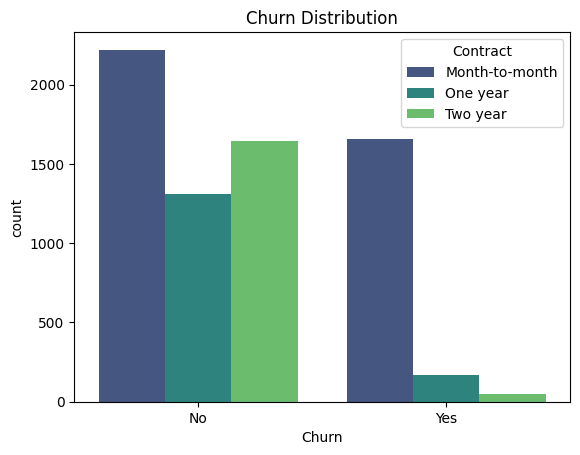

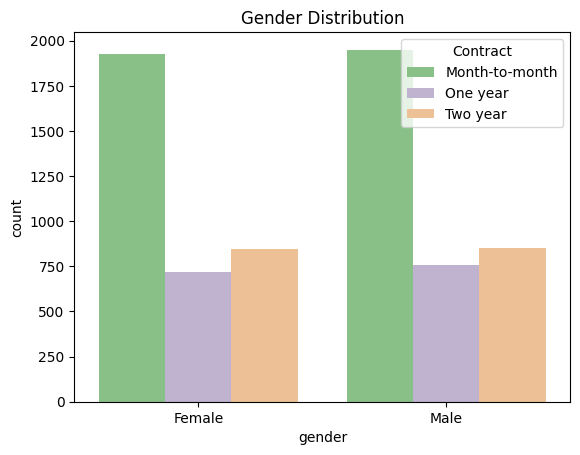

In [ ]:
sns.countplot(data=df, x='Churn', hue='Contract', palette='viridis')
plt.title('Churn Distribution')
plt.show()

sns.countplot(data=df, x='gender', hue='Contract', palette='Accent')
plt.title('Gender Distribution')
plt.show()

The above 2 plots visualises the Churn distribution and Gender Distribution.

2) Visualising Numerical Features

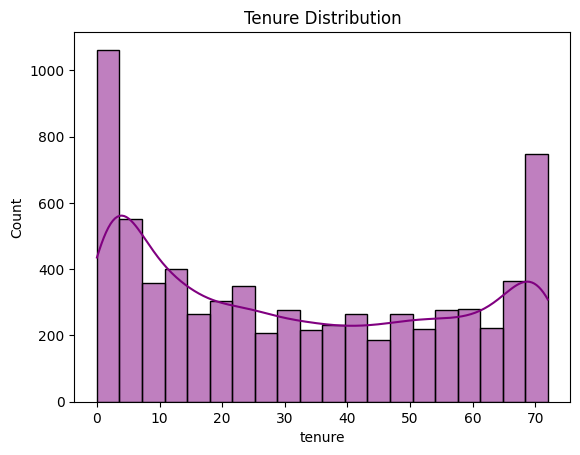

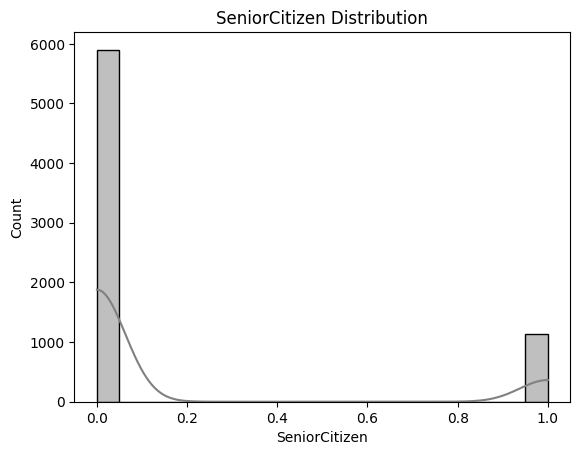

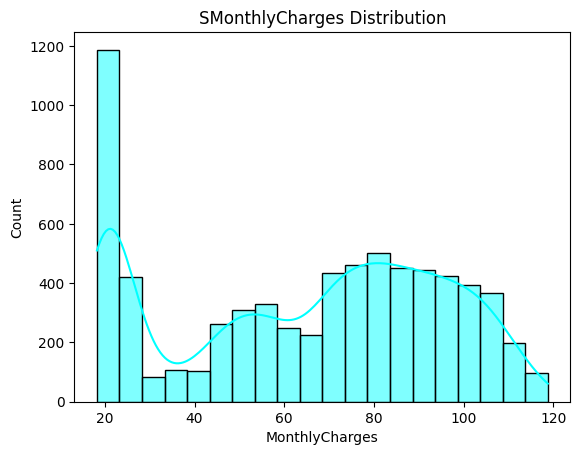

In [ ]:
sns.histplot(data=df, x='tenure', bins=20, kde=True, color='purple')
plt.title('Tenure Distribution')
plt.show()

sns.histplot(data=df, x='SeniorCitizen', bins=20, kde=True, color='grey')
plt.title('SeniorCitizen Distribution')
plt.show()

sns.histplot(data=df, x='MonthlyCharges', bins=20, kde=True, color='aqua')
plt.title('SMonthlyCharges Distribution')
plt.show()

The above three visuals are the distribution of numerical features in the telecom dataset.

3)Bivariate Analysis

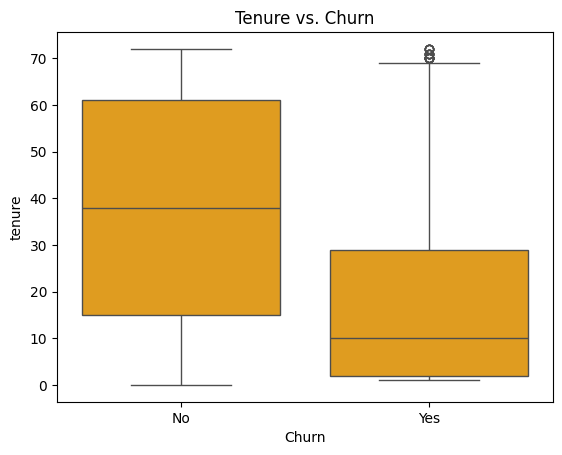

In [ ]:
sns.boxplot(data=df, x='Churn', y='tenure', color='orange')
plt.title('Tenure vs. Churn')
plt.show()

From the above boxplot:

Customers who churned typically have a shorter tenure, with most churners having a tenure below 20 months, indicating early-stage customer churn. Customers who did not churn have a significantly higher median tenure and a wider spread, suggesting longer retention. The presence of outliers in the churned group with high tenure may represent exceptions where customers stayed long but eventually left.



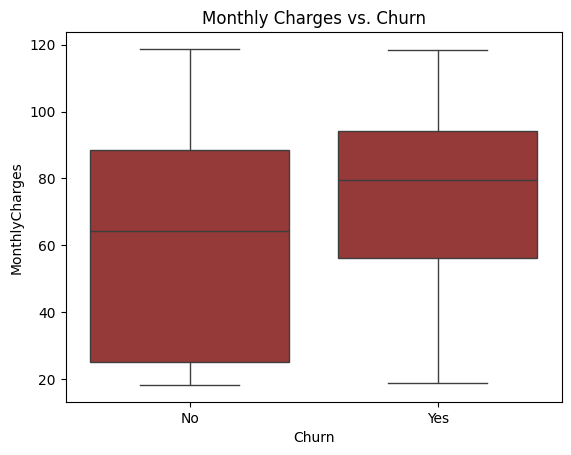

In [ ]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', color='brown')
plt.title('Monthly Charges vs. Churn')
plt.show()

<ipython-input-16-c0e2778f7b74>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data=df, x='InternetService', hue='Churn', color='red')


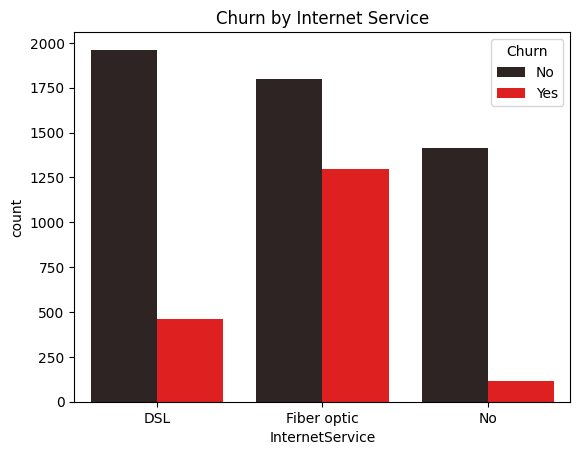

In [ ]:
sns.countplot(data=df, x='InternetService', hue='Churn', color='red')
plt.title('Churn by Internet Service')
plt.show()

4)Mutulative Analysis:

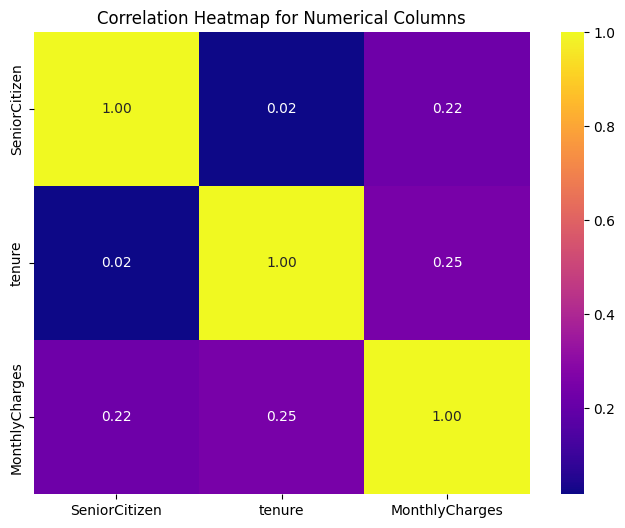

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

Observation from the above Correlation Heatmap are:

Tenure and MonthlyCharges have a low positive correlation (0.25), indicating a slight relationship where longer-tenured customers may have slightly higher monthly charges.

SeniorCitizen has a weak correlation with both MonthlyCharges (0.22) and Tenure (0.02), suggesting minimal influence on these variables.

Overall, the variables show low correlation, implying that each contributes independently to customer behavior or churn.

5)Pair plot:

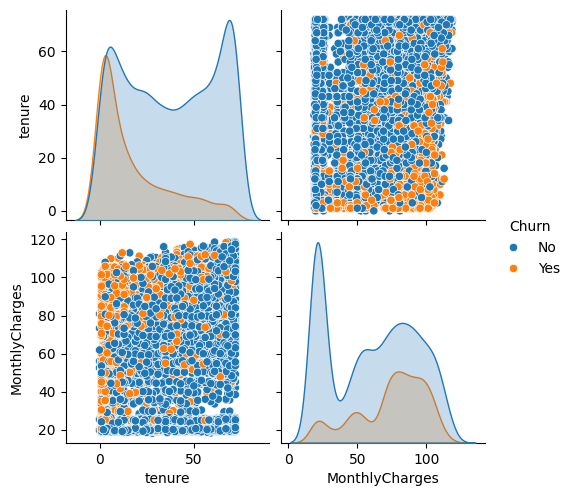

In [ ]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

Customers with lower tenure (close to 0) are more likely to churn, as seen by the concentration of orange points in this region, indicating early-stage churners.

Higher MonthlyCharges are associated with higher churn rates, as indicated by the clustering of churned customers (orange points) in the upper range of MonthlyCharges.

Customers with longer tenure and moderate MonthlyCharges are more likely to stay, as evident by the dominance of non-churned customers (blue points) in these area

Colclusion From EDA:

Month to month contract is more likely opted by customers but has the greatest impact on the Churn rate (increases likelihood to churn by 6.31x).

Customers with a two yearly contract have a very low churn rate. People with higher tenure are very less likely to churn as compared to shorter tenure (1 year).

The customers who pay through electronic checks have higher churn rate whereas the ones who pay through credit card have lower churn rate.

Customers without an internet service have a very low churn rate.

Customers who have Internet service as Fiber Optics as a service are more likely to Churn.

Senior Citizens are more likely to churn. Additional features like Security, Backup, Device Protection and Tech Support make the customer less likely to churn.

Removing irrelevant columns:

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df = df.drop(columns=['customerID'])

The customerID column is an identifier and does not provide meaningful information for modeling.

Handling Categorical Columns:

In [ ]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

In [ ]:
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median())
print("TotalCharges data type:", df['TotalCharges'].dtype)

TotalCharges data type: float64


In [ ]:
print("Missing values in TotalCharges:", df['TotalCharges'].isnull().sum())

Missing values in TotalCharges: 11


In [ ]:
missing_rows = df[df['TotalCharges'].isnull()]
print(missing_rows)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

The rows with missing TotalCharges all have a tenure of 0, which likely indicates that these are customers who recently joined and have not yet been billed, hence their TotalCharges is missing.

Fill Missing TotalCharges with 0


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0)

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
print("Missing values in TotalCharges:", df['TotalCharges'].isnull().sum())

Missing values in TotalCharges: 0


Converted TotalCharges into numerical.

Handle Categorical Columns:

In [ ]:
categorical_columns.remove('TotalCharges')

In [ ]:
binary_categorical = [col for col in categorical_columns if df[col].nunique() == 2]

In [ ]:
multi_categorical = [col for col in categorical_columns if df[col].nunique() > 2]

In [ ]:
print("Binary Categorical Columns:", binary_categorical)
print("Multi-Categorical Columns:", multi_categorical)

Binary Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
Multi-Categorical Columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


Encode Binary Categorical Columns

In [ ]:
binary_categorical = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_categorical:
    df[col] = LabelEncoder().fit_transform(df[col])

print("Binary columns after Label Encoding:")
print(df[binary_categorical].head())

Binary columns after Label Encoding:
   gender  Partner  Dependents  PhoneService  PaperlessBilling  Churn
0       0        1           0             0                 1      0
1       1        0           0             1                 0      0
2       1        0           0             1                 1      1
3       1        0           0             0                 0      0
4       0        0           0             1                 1      1


Using LabelEncoder for the binary categorical columns to convert Yes/No, Male/Female, etc., into 0/1

One-Hot Encoding to Multi-Categorical Columns

In [ ]:
multi_categorical = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_categorical, drop_first=True)

print("Shape after One-Hot Encoding:", df.shape)

Shape after One-Hot Encoding: (7043, 31)


Using One-Hot Encoding for multi-categorical columns to handle categories with more than two unique values.

In [ ]:
print("Processed DataFrame:")
print(df.head())
print("DataFrame Shape:", df.shape)

Processed DataFrame:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1            Fals

Scale Numerical Columns

In [ ]:
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Numerical columns after scaling:")
print(df[numerical_columns].head())

Numerical columns after scaling:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges
0      -0.439916 -1.277445       -1.160323     -0.992611
1      -0.439916  0.066327       -0.259629     -0.172165
2      -0.439916 -1.236724       -0.362660     -0.958066
3      -0.439916  0.514251       -0.746535     -0.193672
4      -0.439916 -1.236724        0.197365     -0.938874


Split the Data

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 30)
Testing set shape: (1409, 30)


A summary of what have done so far:

1. Data Cleaning: Ensured no missing values in the dataset, converted the TotalCharges column from object to float64, and handled any missing values by filling them with the median.
2. Categorical Columns Identification: Segregated categorical columns into binary categorical (e.g., gender, Partner) and multi-categorical (e.g., InternetService, Contract).
3. Encoding Binary Columns: Applied LabelEncoder to binary categorical columns to convert them into 0/1 format.
4. One-Hot Encoding: Encoded multi-categorical columns (e.g., PaymentMethod, StreamingMovies) using one-hot encoding to avoid feature explosion.
5. Scaling Numerical Columns: Scaled numerical features (SeniorCitizen, tenure, MonthlyCharges, TotalCharges) using StandardScaler for uniformity.
6. Feature-Target Split: Separated the features (X) from the target variable (Churn) for machine learning.
7. Train-Test Split: Divided the dataset into training (80%) and testing (20%) subsets to train and evaluate models effectively. This preprocessing pipeline has prepared the data for model training.

Check Class Imbalance

In [ ]:
print("Class distribution in Churn column:")
print(y.value_counts())

Class distribution in Churn column:
Churn
0    5174
1    1869
Name: count, dtype: int64


The Churn column is imbalanced, significantly more 0 than 1, so applying SMOTE to balance:

Apply SMOTE

In [ ]:
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:")
print(y_train_smoteenn.value_counts())

Class distribution after SMOTE:
Churn
1    2959
0    2211
Name: count, dtype: int64


Now, the Churn column is balanced.

In [ ]:
print("Shape of X_train before SMOTEENN:", X_train.shape)
print("Shape of X_train after SMOTEENN:", X_train_smoteenn.shape)
print("Shape of y_train before SMOTEENN:", y_train.shape)
print("Shape of y_train after SMOTEENN:", y_train_smoteenn.shape)

Shape of X_train before SMOTEENN: (5634, 30)
Shape of X_train after SMOTEENN: (5170, 30)
Shape of y_train before SMOTEENN: (5634,)
Shape of y_train after SMOTEENN: (5170,)


Train a Machine Learning Model.

a)RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1   )

grid_search.fit(X_train_smoteenn, y_train_smoteenn)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [ ]:
best_params_rf = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Parameters for Random Forest:", best_params_rf)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Evaluate the Best Model

In [ ]:
y_pred = best_rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7267565649396736

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.78      1036
           1       0.49      0.87      0.63       373

    accuracy                           0.73      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.82      0.73      0.74      1409



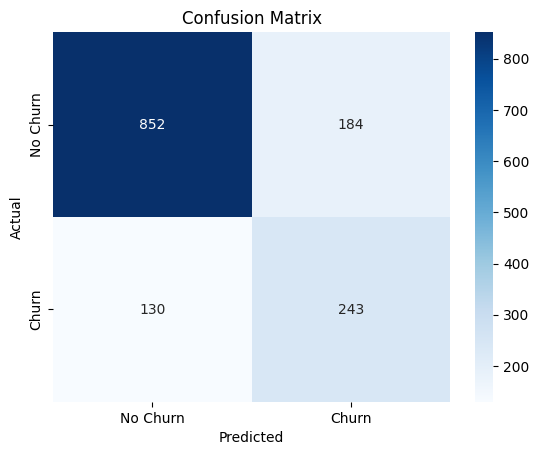

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix shows the model's predictions for No Churn (class 0) and Churn (class 1) compared to the actual values.

The model correctly predicted 855 No Churns and 239 Churns, while it misclassified 181 No Churns as Churn (false positives) and 134 Churns as No Churn (false negatives).

The model performs well overall but has room for improvement in reducing false negatives (missed churn cases) to enhance recall for the churned class.

Analyze Feature Importance

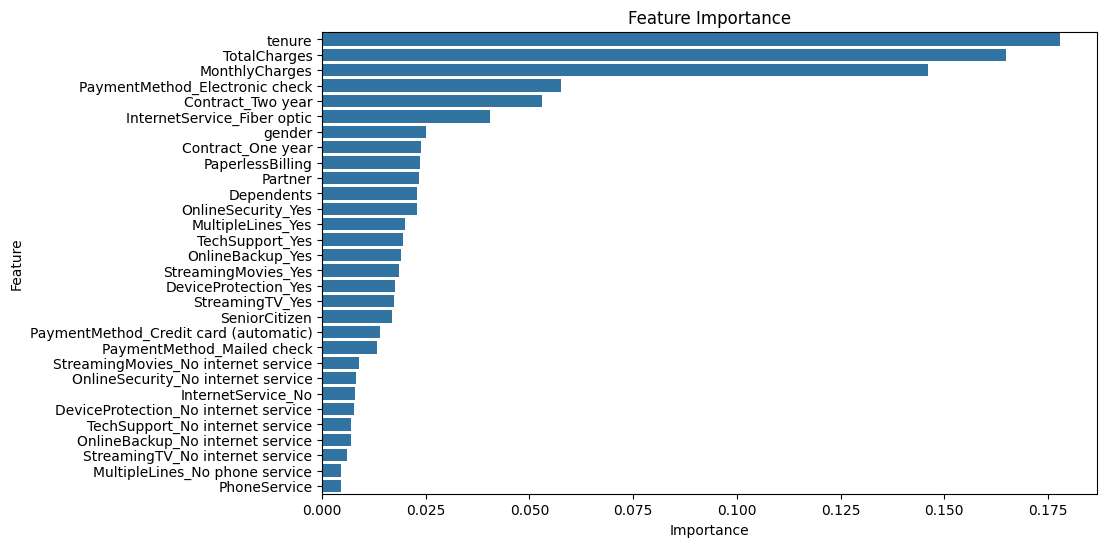

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()

The feature importance plot shows that tenure, TotalCharges, and MonthlyCharges are the most influential factors in predicting customer churn, highlighting their strong correlation with churn behavior.

Features like PaymentMethod_Electronic check, Contract_Two year, and InternetService_Fiber optic also play significant roles, indicating that contract types and payment methods impact churn.

Less important features include categories like No internet service and PhoneService, suggesting they have minimal influence on churn prediction in this dataset

B)Gradient Boosting:

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

In [ ]:
gb_model.fit(X_train_smoteenn, y_train_smoteenn)

GradientBoostingClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid,
    scoring='f1',
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train_smoteenn, y_train_smoteenn)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
best_gb_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.05}


In [ ]:
y_pred = gb_model.predict(X_test)
print("Accuracy on Original Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Original Test Set: 0.7132718239886444

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.65      0.77      1036
           1       0.48      0.90      0.62       373

    accuracy                           0.71      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.82      0.71      0.73      1409



Key Metrics to Monitor
1. Accuracy on Original Test Set:
  Indicates general performance on real-world data.
2. Recall for Minority Class (Churn):
Ensure the model correctly identifies churn cases.
3. Cross-Validation Accuracy:
Confirms model robustness across multiple data splits.


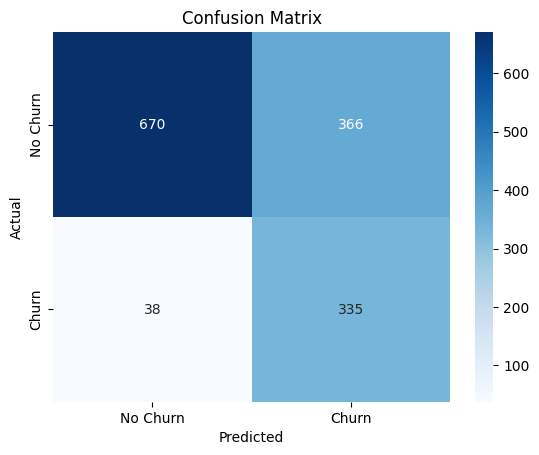

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

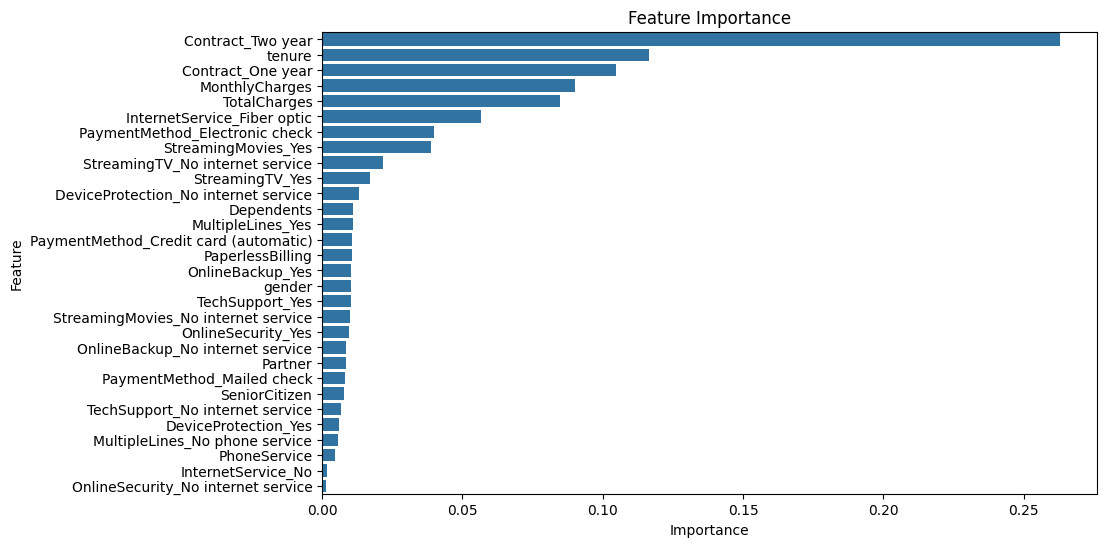

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()

The feature importance plot shows that contract type (Two-year and One-year), tenure, and MonthlyCharges are the most significant predictors of customer churn, indicating that longer-term contracts and higher tenure reduce churn likelihood.

Features like InternetService_Fiber optic and PaymentMethod_Electronic check also strongly influence churn, suggesting customers with fiber optic services or electronic checks are more likely to churn.

Less significant features, such as PhoneService and SeniorCitizen, have minimal impact on churn prediction, implying they contribute less to the model's decisions.

c)LightGBM Model

In [ ]:
lgb_model = LGBMClassifier(random_state=42)

In [ ]:
lgb_model.fit(X_train_smoteenn, y_train_smoteenn)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2959, number of negative: 2211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 5170, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.572340 -> initscore=0.291406
[LightGBM] [Info] Start training from score 0.291406


LGBMClassifier(random_state=42)

In [ ]:
y_pred = lgb_model.predict(X_test)

In [ ]:
print("Accuracy on Original Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Original Test Set: 0.7210787792760823

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.67      0.78      1036
           1       0.48      0.86      0.62       373

    accuracy                           0.72      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.81      0.72      0.74      1409



d)Logistic Regression:

In [ ]:
log_model = LogisticRegression(random_state=42, max_iter=1000)

In [ ]:
log_model.fit(X_train_smoteenn, y_train_smoteenn)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = log_model.predict(X_test)

In [ ]:
print("Accuracy on Original Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Original Test Set: 0.7111426543647977

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.65      0.77      1036
           1       0.48      0.87      0.61       373

    accuracy                           0.71      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.81      0.71      0.73      1409



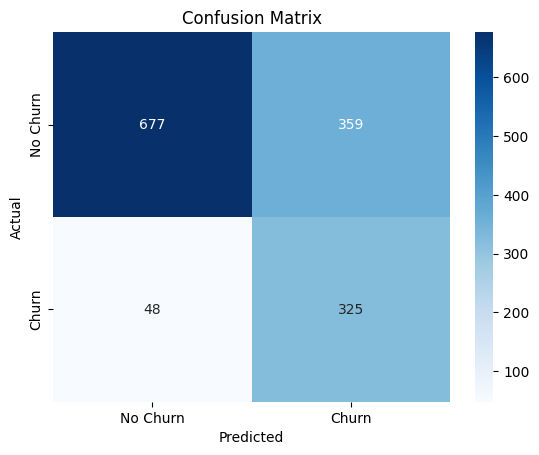

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear']        # Solver for small datasets
}


In [ ]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train_smoteenn, y_train_smoteenn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1', verbose=2)

In [ ]:
best_log_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
y_pred_tuned = best_log_model.predict(X_test)

In [ ]:
print("Tuned Accuracy on Original Test Set:", accuracy_score(y_test, y_pred_tuned))
print("\nTuned Classification Report:\n", classification_report(y_test, y_pred_tuned))

Tuned Accuracy on Original Test Set: 0.709013484740951

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.66      0.77      1036
           1       0.47      0.85      0.61       373

    accuracy                           0.71      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.81      0.71      0.73      1409



e)Neural Network:

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_smoteenn.shape[1]),  # Input layer
    Dropout(0.3),                                                      # Dropout for regularization
    Dense(32, activation='relu'),                                      # Hidden layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')                                     # Output layer (binary classification)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop training if validation loss doesn't improve for 5 epochs
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train_smoteenn,
    y_train_smoteenn,
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7222 - loss: 0.5336 - val_accuracy: 0.8627 - val_loss: 0.3220
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8835 - loss: 0.2917 - val_accuracy: 0.8549 - val_loss: 0.3107
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8966 - loss: 0.2566 - val_accuracy: 0.8462 - val_loss: 0.3211
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8937 - loss: 0.2550 - val_accuracy: 0.8665 - val_loss: 0.2987
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8992 - loss: 0.2549 - val_accuracy: 0.8714 - val_loss: 0.2808
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9036 - loss: 0.2333 - val_accuracy: 0.8675 - val_loss: 0.3011
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9084 - loss: 0.2436 - val_accuracy: 0.8723 - val_loss: 0.2921
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9061 - loss: 0.2318 - val_accuracy: 0.

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
print("Accuracy on Original Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Original Test Set: 0.7239176721078779

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.78      1036
           1       0.49      0.85      0.62       373

    accuracy                           0.72      1409
   macro avg       0.71      0.76      0.70      1409
weighted avg       0.81      0.72      0.74      1409



Plotting Training Progress:

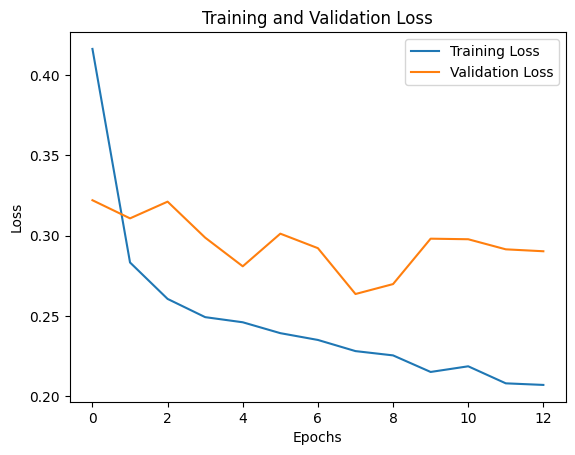

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

f)SVM Model

In [ ]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # Using RBF kernel for non-linear relationships

In [ ]:
svm_model.fit(X_train_smoteenn, y_train_smoteenn)

SVC(probability=True, random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print("Accuracy on Original Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Original Test Set: 0.7154009936124911

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.67      0.78      1036
           1       0.48      0.85      0.61       373

    accuracy                           0.72      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.81      0.72      0.73      1409



In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],      # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Kernel types
}

In [ ]:
grid_search = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1
)


In [ ]:
grid_search.fit(X_train_smoteenn, y_train_smoteenn)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             scoring='f1', verbose=2)

In [ ]:
best_svm_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
y_pred_tuned = best_svm_model.predict(X_test)

In [ ]:
print("Tuned Accuracy on Original Test Set:", accuracy_score(y_test, y_pred_tuned))
print("\nTuned Classification Report:\n", classification_report(y_test, y_pred_tuned))

Tuned Accuracy on Original Test Set: 0.7466288147622427

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1036
           1       0.51      0.77      0.62       373

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409



Comparing Models:

In [ ]:
comparison_df = pd.DataFrame({
    'Model': ['SVM (Tuned)', 'Neural Network', 'Logistic Regression', 'LightGBM', 'Gradient Boosting', 'Random Forest'],
    'Accuracy': [74.66, 72.39, 70.90, 72.10, 71.33, 72.68],
    'Precision_Churn': [51, 49, 47, 48, 48, 49],
    'Recall_Churn': [77, 85, 85, 86, 90, 87],
    'F1_Score_Churn': [62, 62, 61, 62, 62, 63]
})

In [ ]:
comparison_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

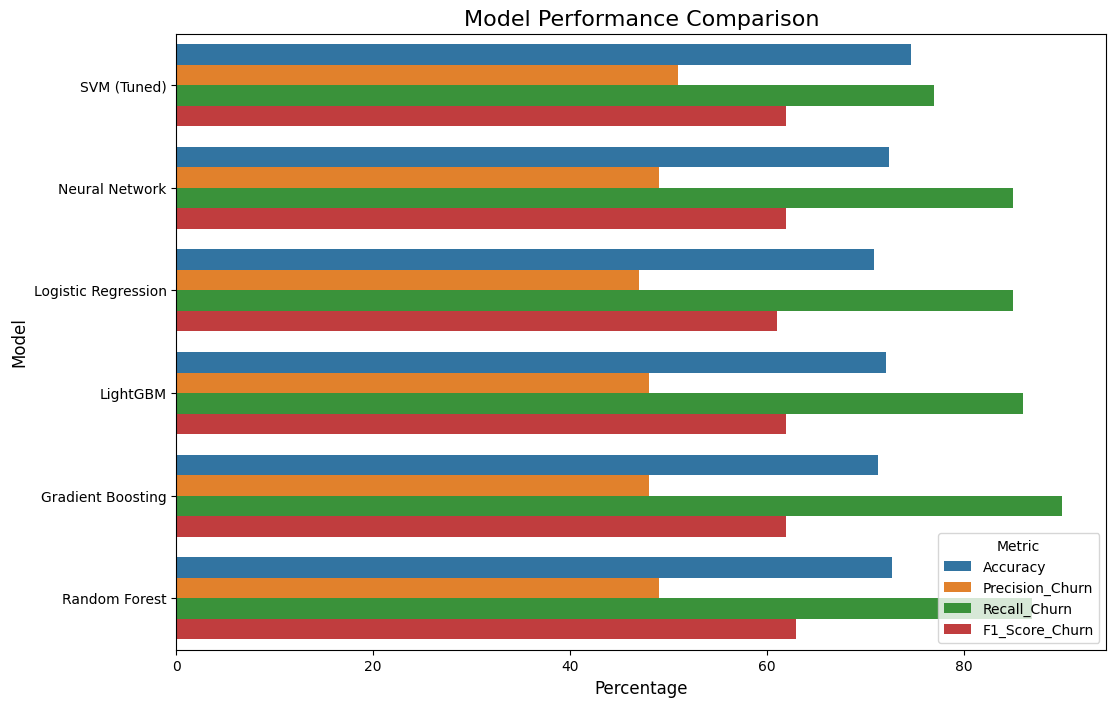

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Value', y='Model', hue='Metric', data=comparison_melted)
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.legend(title='Metric', loc='lower right')
plt.show()

Observations

 SVM (Tuned):

High Recall (77%): Good at capturing churn cases.
Moderate F1-Score (62%): Balances precision and recall reasonably.
High Accuracy (74.66%): Among the highest, indicating good overall performance.

Neural Network:

High Recall (85%): Excellent for identifying churn cases.
Moderate Precision (49%): Some false positives, which might increase retention costs.
F1-Score (62%): Matches the best models for churn F1-score.

Logistic Regression:

High Recall (85%): Strong at identifying churn.
Low Precision (47%): Prone to false positives.
Accuracy (70.90%): Slightly lower compared to other models.

LightGBM:

High Recall (86%): Second highest among all models.
Moderate Precision (48%): Similar to Neural Network.
F1-Score (62%): Matches top models.

Gradient Boosting:

Highest Recall (90%): Excellent at identifying churn.
Moderate Precision (48%): Balances churn detection and false positives.
Accuracy (71.33%): Slightly lower, but
recall dominates for churn-focused goals.

Random Forest:

High Recall (87%): Good for identifying churn.
Best F1-Score (63%): Balances recall and precision better than other models.
Accuracy (72.68%): Strong overall performance.


Gradient Boosting is an excellent option, especially when minimizing churn cases is a priority due to its high recall (90%) for churn

 Save the Best Gradient Boosting Model:

In [ ]:
joblib.dump(best_gb_model, 'best_gradient_boosting_model.pkl')
print("Best Gradient Boosting model saved as 'best_gradient_boosting_model.pkl'")


Best Gradient Boosting model saved as 'best_gradient_boosting_model.pkl'


Load the Model for Prediction

In [ ]:
loaded_model = joblib.load('best_gradient_boosting_model.pkl')

In [ ]:
y_pred_loaded = loaded_model.predict(X_test)

In [ ]:
print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded))
print("\nLoaded Model Classification Report:\n", classification_report(y_test, y_pred_loaded))

Loaded Model Accuracy: 0.7352732434350603

Loaded Model Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.69      0.79      1036
           1       0.50      0.87      0.64       373

    accuracy                           0.74      1409
   macro avg       0.72      0.78      0.71      1409
weighted avg       0.82      0.74      0.75      1409



In [ ]:
df['Predicted_Churn'] = best_gb_model.predict(df.drop('Churn', axis=1))

In [ ]:
df.to_csv('churn_predictions.csv', index=False)
print("Predictions saved as 'churn_predictions.csv'")

Predictions saved as 'churn_predictions.csv'
